In [6]:
import pandas as pd

# NLTK
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# TextBlob
from textblob import TextBlob

# Stanza
import stanza
stanza.download('en')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sheenasalwan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


2022-10-12 01:13:23 INFO: Downloading default packages for language: en (English) ...


2022-10-12 01:13:24 INFO: File exists: /Users/sheenasalwan/stanza_resources/en/default.zip
2022-10-12 01:13:28 INFO: Finished downloading models and saved to /Users/sheenasalwan/stanza_resources.


In [8]:
df_tweet = pd.read_csv("../data/vaccination_tweets_cleaned.csv")

/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (0,1,6,7,8,9,14,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### Sentiment Analysis with NLTK Vader

In [29]:
sia = SentimentIntensityAnalyzer()

# Obtaining NLTK scores
df_tweet['nltk_scores'] = df_tweet['text'].apply(lambda x: sia.polarity_scores(x))

# Obtaining NLTK compound score
df_tweet['nltk_cmp_score'] = df_tweet['nltk_scores'].apply(lambda score_dict: score_dict['compound'])

In [30]:
neutral_thresh = 0.05

In [31]:
# Categorize scores into the sentiments of positive, neutral or negative
df_tweet['nltk_sentiment'] = df_tweet['nltk_cmp_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))


In [33]:
df_tweet.tail()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,tokenized,nltk_scores,nltk_cmp_score,nltk_sentiment
206962,1445962108055732232,COVID News,Estados Unidos,News about COVID-19,2013-06-05 08:52:31,3373,1472,129,False,2021-10-07 04:00:05,45 urban bengaluru covidvaccine availability f...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",Revive Social App,0,0,False,"[45, urban, bengaluru, covidvaccine, availabil...","{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'comp...",0.5106,Positive
206963,1445956889305440264,CoWIN Blore 18-44,"Bengaluru, India",Get instant alerts for Free/Paid slots in BBMP...,2021-06-29 09:33:13,21,0,2,False,2021-10-07 03:39:21,pincode 560011\nsputnik v dose 1 100 slots\n\...,NaN,CowinAlertsBot,0,0,False,"[pincode, 560011, sputnik, v, dose, 1, 100, sl...","{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'comp...",0.4215,Positive
206964,1445954643419226114,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,26,0,0,False,2021-10-07 03:30:26,1844 bbmp bengaluru covidvaccine availability ...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False,"[1844, bbmp, bengaluru, covidvaccine, availabi...","{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...",0.5106,Positive
206965,1445954599345475592,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,26,0,0,False,2021-10-07 03:30:15,1844 urban bengaluru covidvaccine availability...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False,"[1844, urban, bengaluru, covidvaccine, availab...","{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'comp...",0.5106,Positive
206966,1445947047052333057,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,26,0,0,False,2021-10-07 03:00:15,45 urban bengaluru covidvaccine availability f...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False,"[45, urban, bengaluru, covidvaccine, availabil...","{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'comp...",0.5106,Positive


In [35]:
df_tweet['nltk_cmp_score'].describe()

count    206967.000000
mean          0.090341
std           0.328712
min          -0.963400
25%           0.000000
50%           0.000000
75%           0.361200
max           0.984700
Name: nltk_cmp_score, dtype: float64

In [38]:
nltk_sentiment_df = get_value_counts('nltk_sentiment','NLTK Vader')
nltk_sentiment_df

,sentiment,counts,percentage,analyzer
0,Negative,33552,16.21,NLTK Vader
1,Neutral,103614,50.06,NLTK Vader
2,Positive,69801,33.73,NLTK Vader


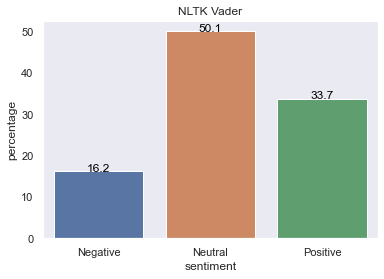

In [43]:
sns.set_theme(style="dark")
ax = sns.barplot(x="sentiment", y="percentage", data=nltk_sentiment_df)
ax.set_title('NLTK Vader')

for index, row in nltk_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

#### Sentiment Analysis with TextBlob

In [46]:
# Obtain polarity scores generated by TextBlob
df_tweet['textblob_score'] = df_tweet['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [47]:
neutral_thresh = 0.05

In [48]:
# Convert polarity score into sentiment categories
df_tweet['textblob_sentiment'] = df_tweet['textblob_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))


In [49]:
df_tweet['textblob_score'].describe()

count    206967.000000
mean          0.084630
std           0.218079
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.172222
max           1.000000
Name: textblob_score, dtype: float64

In [50]:
textblob_sentiment_df = get_value_counts('textblob_sentiment','TextBlob')
textblob_sentiment_df

,sentiment,counts,percentage,analyzer
0,Negative,19984,9.66,TextBlob
1,Neutral,118239,57.13,TextBlob
2,Positive,68744,33.21,TextBlob


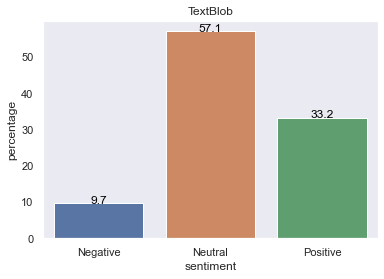

In [51]:
sns.set_theme(style="dark")
ax = sns.barplot(x="sentiment", y="percentage", data=textblob_sentiment_df)
ax.set_title('TextBlob')

for index, row in textblob_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

#### Average

In [85]:
df_tweet['composite_score'] =  (df_tweet['nltk_cmp_score'] 
                                + df_tweet['textblob_score']
                                )/2

In [118]:
neutral_thresh = 0.05

In [119]:
# Convert average sentiment score (from all 3 analyzers) into sentiment categories
df_tweet['composite_vote_2'] = df_tweet['composite_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

In [120]:
composite_sentiment_df_2 = get_value_counts('composite_vote_2','Composite Sentiment')
composite_sentiment_df_2

,sentiment,counts,percentage,analyzer
0,Negative,28569,13.80,Composite Sentiment
1,Neutral,101250,48.92,Composite Sentiment
2,Positive,77148,37.28,Composite Sentiment


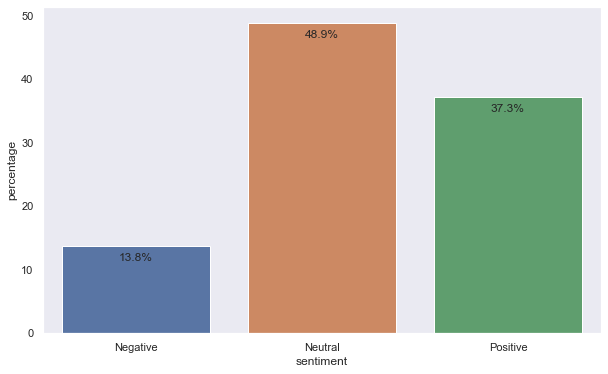

In [121]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="sentiment", y="percentage",
                 data=composite_sentiment_df_2)

# Display annotations
for p in ax.patches:
    ax.annotate(f"{round(p.get_height(),1)}%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

In [ ]:
df_tweet.to_csv("../data/vaccination_tweets_sentiment.csv")